In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Integration

As with derivatives, there are two cases where we need to do integrals:

1. We are given a function $f(x)$ and are free to evaluate it wherever we wish to compute the integral in a domain $[a,b]$.

2. We are given $N$ points (possibly equally spaced) in $[a,b]$ and want to use them to construct the integral over the domain.

We'll assume here that the discrete data we have is at equally spaced points, and we will treat cases 1 and 2 with the same methods.  However, note that in general, if you have the freedom to evaluate $f(x)$ at any $x$ (case 1), then you can usually get a far better estimate of the integral by carefully selecting the points to evaluate at, compared to using the same number of equally spaced points (see for instance [Gaussian quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature)).

In calculus, you saw a definition of a definite integral that looked something like:

$$
I \equiv \int_a^b f(x) dx = \lim_{\Delta x \rightarrow 0} \sum_{i = 1}^N f(x_i) \Delta x
$$

where the number of intervals you divide $[a, b]$ into, $N$, is defined such that $N = (b - a) / \Delta x$.  Also recall that this definition is directly related to the interpretation of an integral representing the area under a curve.

For numerical integration, we will replace the continuous integral with a sum over a finite number of points (we will not take the limit, since we can't sum over an infinite number of points on a computer in a finite amount of time).

Any expression for an integral of the form:

$$
I \equiv \int_a^b f(x) dx \approx \sum_{i=1}^{N} w_i f(x_i)
$$

is called a *quadrature rule* in numerical analysis.  Here $w_i$ are the weights multiplying the function values.  Different quadrature rules will have different weights and have differing accuracy and convergence properties.

## Simple numerical integration

We'll first look at the case where we represent the data using a low order polynomial and approximate the integral under the function as the area under the polynomial.  With evenly spaced points, these are sometimes called [Newton-Cotes quadrature rules](https://en.wikipedia.org/wiki/Newton%E2%80%93Cotes_formulas).

### Rectangle rule

The simplest method of doing a numerical integral is to approximate the function as a constant.  This means we use a single value of $f(x)$ to compute the integral.  For instance, we use $f(a)$, the value of the function at the leftmost point of the integration range.  This is called the *rectangle rule*:

$$
I_r = f(a) (b - a)
$$


Visually, this looks like:

![rectangle rule](rectangle_N1.png)

## Trapezoid rule

The rectangle rule did not account for any variation of $f(x)$ over the domain.  But we can do better simply by evaluating $f(x)$ at the endpoints of each domain and connecting them via a straight line&mdash;this is a linear interpolation.  Now we have a trapezoids, so the integral is just the area of the trapezoid, giving rise to the *trapezoid rule*.

$$
I_t = \frac{b - a}{2} (f(a) + f(b))
$$

Visually, this looks like:

![trapezoid rule](trapezoid_N1.png)

## Simpson's rule

With the trapezoid, we represented that data as a line in each slab.  We can move up to a parabola, but now we need 3 points, so we will use the midpoint of the domain as well.  We then compute the integral by integrating under the parabola.

$$
I_s = \frac{b - a}{6} \left [f(a) + 4 f\left (\frac{a+b}{2}\right ) + f(b) \right ]
$$

Visually, this looks like:

![Simpsons rule](simpsons_N1.png)

<div class="alert alert-block alert-info">

**Exercise:**
    
Consider the function
    
$$
f(x) = 1 + \frac{x}{4} \sin(\pi x)
$$
 
(this is the function that is drawn in the figures).
Compute
    
$$
I = \int_{1/2}^{3/2} f(x) dx
$$
    
using the rectange rule, trapezoid rule, and Simpson's rule.
    
Note: the analytic result is

$$
I = 1 - \frac{1}{2\pi^2} \approx 0.949
$$

   
</div>

In [2]:
# define the function

def f(x):
    return 1 + 0.25 * x * np.sin(np.pi * x)

a = 0.5
b = 1.5

# compute the 3 different approximations

I_r = f(a) * (b - a)
I_t = 0.5 * (f(a) + f(b)) * (b - a)
I_s = (b - a) / 6.0 * (f(a) + 4 * f((a + b)/2) + f(b))

I_a = 1 - 1/(2 * np.pi**2)

print(I_r, I_t, I_s, I_a)

1.125 0.875 0.9583333333333333 0.9493394081788311


Note: you can compare you answers to the figures.  You should see that for the rectangle rule you got the largest error and your value is larger than the true integral&mdash;just like the shaded rectangle is above the true function over almost all of the domain.  With the trapezoid rule, you should see that your approximation is smaller than the true integral&mdash;&again, just like how the shaded area is below the true function over most of the domain.

 ## Composite integration

It usually doesn't pay to go to higher-order polynomials (e.g., fitting a cubic to 4 points in the domain).  Instead, we can do composite integration by dividing our domain $[a, b]$ into slabs, and then using the above approximations.

Here's an illustration of dividing the domain into 6 slabs:

![compound integration examples with N=6](compound2.png)

Imagine using $N$ slabs.
For the rectangle and trapezoid rules, we would apply them N times (once per slab) and sum up the integrals in each slab.
For the Simpson's rule, we would apply Simpson's rule over 2 slabs at a time and sum up the integrals over the $N/2$ pair of slabs (this assumes that $N$ is even).


The composite rule for trapezoid integration is:

$$
\int_a^b f(x) dx = \frac{\Delta x}{2} \sum_{i=0}^{N-1} (f_i + f_{i+1}) + \mathcal{O}(\Delta x^2)
$$

and for Simpson's rule, it is:

$$
\int_a^b f(x) dx = \frac{\Delta x}{3} \sum_{i = 0}^{N/2-1} (f_{2i} + 4 f_{2i+1} + f_{2i+2}) + \mathcal{O}(\Delta x^4)
$$

<div class="alert alert-block alert-info">

**Exercise:**
    
For the function in the previous exercise, perform a composite integral using the trapezoid and Simpson's rule for $N = 2, 4, 8, 16, 32$.
Compute the error with respect to the analytic solution and make a plot of the error vs. $N$ for both methods.  Do the errors follow the scaling shown in the expressions above?
    
</div>

Text(0, 0.5, 'error')

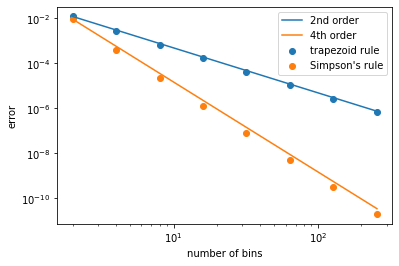

In [4]:
def f(x):
    return 1 + 0.25 * x * np.sin(np.pi * x)

def I_t(x):
    """composite trapezoid rule"""
    N = len(x)-1
    I = 0.0
    for n in range(N):
        I += 0.5*(x[n+1] - x[n]) * (f(x[n]) + f(x[n+1]))
    return I

def I_s(x):
    """composite Simpsons rule"""
    N = len(x)-1
    I = 0.0
    for n in range(0, N, 2):
        dx = x[n+1] - x[n]
        I += dx/3.0 * (f(x[n])+ 4 * f(x[n+1]) + f(x[n+2]))
    return I

# integration bounds

a = 0.5
b = 1.5

# number of bins
N = [2, 4, 8, 16, 32, 64, 128, 256]

# analytic solution

I_a = 1 - 1/(2 * np.pi**2)

# keep track of the errors for each N

err_trap = []
err_simps = []

for nbins in N:

    # x values (including rightmost point)
    x = np.linspace(a, b, nbins+1)

    err_trap.append(np.abs(I_t(x) - I_a))
    err_simps.append(np.abs(I_s(x) - I_a))

# make the lists into numpy arrays so we can do math on them

err_trap = np.asarray(err_trap)
err_simps = np.asarray(err_simps)
N = np.asarray(N)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(N, err_trap, label="trapezoid rule")
ax.scatter(N, err_simps, label="Simpson's rule")

# compute the ideal scaling
# err = err_0 (N_0 / N) ** order
fourth_order = err_simps[0] * (N[0]/N)**4
second_order = err_trap[0] * (N[0]/N)**2

ax.plot(N, second_order, label="2nd order")
ax.plot(N, fourth_order, label="4th order")

ax.set_xscale("log")
ax.set_yscale("log")

ax.legend()
ax.set_xlabel("number of bins")
ax.set_ylabel("error")

One thing to note: as you make the number of bins larger and larger, eventually you'll hit a limit to how accurate you can get the integral (somewhere around N ~ 4096 bins for Simpson's).  Beyond that, roundoff error dominates.